<a href="https://colab.research.google.com/github/yuricasilvanadeassiscaetano120713-beep/MachineLearningCodes/blob/main/ProjectMLisHere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
#load the dataset
data=fetch_openml('titanic',version=1,as_frame=True)
print(data)

In [ ]:
data['feature_names']

In [ ]:
data_f=data.frame.copy()

In [ ]:
#Dropping the empty values
data=data_f[['age','sex','fare','embarked','pclass','survived']].dropna()

In [ ]:
set(list(data['embarked']))

In [ ]:
#Label Encoding
le=LabelEncoder()
data['embarked_le']=le.fit_transform(data['embarked'])

In [ ]:
data.columns

In [ ]:
data['embarked_le'].value_counts()

In [ ]:
#One-Hot Encoding
ohe=OneHotEncoder()
df_ohe=pd.get_dummies(data['sex'])
df_ohe

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment

# Step 1: Upload MP3 files
print("👉 Upload your MP3 files")
uploaded = files.upload()

# Get filenames
mp3_files = list(uploaded.keys())

# Convert MP3s to WAVs
wav_files = []
for i, mp3 in enumerate(mp3_files):
    sound = AudioSegment.from_mp3(mp3)
    wav_name = f"audio{i+1}.wav"
    sound.export(wav_name, format="wav")
    wav_files.append(wav_name)

# Step 2: Read converted WAV files
rate1, audio1 = wavfile.read(wav_files[0])
rate2, audio2 = wavfile.read(wav_files[1])

# Step 3: Convert stereo to mono if needed
if len(audio1.shape) > 1:
    audio1 = audio1.mean(axis=1)
if len(audio2.shape) > 1:
    audio2 = audio2.mean(axis=1)

# Step 4: Ensure same length (truncate to shortest)
min_len = min(len(audio1), len(audio2))
audio1 = audio1[:min_len]
audio2 = audio2[:min_len]

# Step 5: Normalize
audio1 = audio1.astype(float) / np.max(np.abs(audio1))
audio2 = audio2.astype(float) / np.max(np.abs(audio2))

# Step 6: Cross-correlation
cross_corr = np.correlate(audio1, audio2, mode='full')
lags_cross = np.arange(-len(audio2) + 1, len(audio1))

# Step 7: Autocorrelation of first audio
auto_corr = np.correlate(audio1, audio1, mode='full')
lags_auto = np.arange(-len(audio1) + 1, len(audio1))

# Step 8: Best lag (time shift)
best_lag_index = np.argmax(cross_corr)
best_lag_samples = lags_cross[best_lag_index]
best_lag_seconds = best_lag_samples / rate1
print(f"Best match lag: {best_lag_samples} samples ({best_lag_seconds:.3f} seconds)")

# Step 9: Plot
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(lags_cross, cross_corr)
plt.title("Cross-Correlation between audio1 and audio2")
plt.xlabel("Lag (samples)")
plt.ylabel("Correlation")

plt.subplot(2, 1, 2)
plt.plot(lags_auto, auto_corr)
plt.title("Autocorrelation of audio1")
plt.xlabel("Lag (samples)")
plt.ylabel("Correlation")

plt.tight_layout()
plt.show()

***Regressao Linear***

In [ ]:
import pandas as pd
dados = pd.DataFrame({
    'X': [1,2,3,4,5],
    'Y': [1.3,1.8,3.5,4,4.6]
})
dados.head(2)

,X,Y
0,1,1.3
1,2,1.8


In [ ]:
dados.head(3)

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3


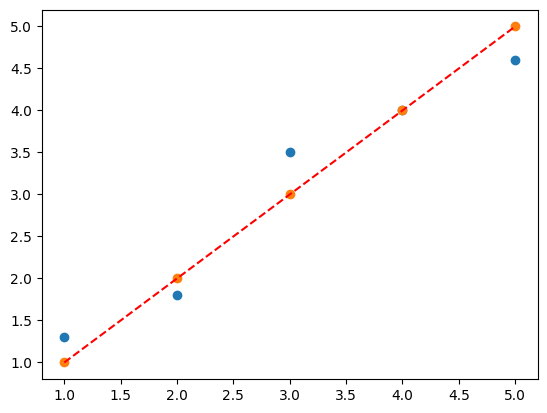

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(dados.X,dados.Y)
ax.plot(dados.X,dados.y_reta,'--r')
ax.scatter(dados.X,dados.y_reta)
plt.show()

In [ ]:
#Fazmemos x=y nessa recta vermelhoa
dados['y_reta'] = dados.X

# ***Comparative Analysis of Regression Techniques on Unique Datasets***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("ai4i2020.csv")
print("Data shape:", df.shape)
print("\nData preview:\n", df.head())

print("\nInfo:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDescriptive stats:\n", df.describe())

target = "Tool wear [min]"
X = df.drop(columns=[target])
y = df[target]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MSE": mse, "R²": r2})

results_df = pd.DataFrame(results)
print("\nPerformance Comparison:\n")
print(results_df)

Data shape: (10000, 14)

Data preview:
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0